This code simulates traffic density dynamics using a graph-based representation of a road network. Nodes in the graph represent intersections, while directed edges represent roads connecting these intersections. Each node is assigned an initial random traffic density, and the traffic flow between nodes is updated iteratively based on a simple flow model. The flow depends on the difference in densities between connected nodes and a max_speed parameter, which constrains the rate of flow. This setup effectively models how traffic evolves across a network over time.

The simulation incorporates additional complexity by modeling intersection behavior. An intersection is represented as a queue with a fixed size, simulating the limited capacity of real-world intersections to manage vehicle throughput. Vehicles can only move into intersections if there is space available, and the movement between intersections is governed by the traffic density at neighboring nodes. This feature adds realism by introducing bottlenecks and delays, which can lead to congestion in areas with high traffic density.

The results of the simulation are visualized through two methods. A heatmap displays how normalized traffic densities evolve across all nodes and time steps, offering a global view of traffic patterns. Additionally, the graph itself is visualized at regular intervals, with node colors representing current traffic densities. These snapshots highlight areas of high and low density, making it easy to observe how congestion propagates through the network. This combination of simulation and visualization provides a powerful tool for analyzing traffic flow dynamics and identifying potential strategies for mitigating congestion.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation
import networkx as nx
import numpy as np
from scipy.io import loadmat

In [ ]:
data = loadmat('/content/drive/MyDrive/modsim/United States_Philadelphia.mat')

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'N', 'T', 'W', 'L', 'data', 'pos'])

In [ ]:
traffic_density_data = data['data']
adjacency_matrix = data['W']

In [ ]:
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]

In [ ]:
time_steps = 100
max_speed = 1

In [ ]:
pos = nx.spring_layout(G, seed=42)

In [ ]:
first_node = list(G.nodes)[0]  # Get the first node
first_node_density = G.nodes[first_node]['density']  # Access its density
print(f"Density of the first node ({first_node}): {first_node_density}")


Density of the first node (0): 13


In [ ]:
# data = loadmat('/content/United States_Philadelphia (1).mat')
traffic_density_data = data['data']
adjacency_matrix = data['W']
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]
time_steps = 100
max_speed = 1
pos = nx.spring_layout(G, seed=42)
def update_graph(t):
    for u, v, edge_data in G.edges(data=True):
        density_u = G.nodes[u]['density']
        density_v = G.nodes[v]['density']
        flow = max_speed * (density_u - density_v)
        G.nodes[u]['density'] -= flow
        G.nodes[v]['density'] += flow
    intersection_size = 10
    intersection_occupancy = np.zeros(intersection_size)

    for node in G.nodes:
        for i in range(intersection_size - 1, 0, -1):
            if intersection_occupancy[i] == 0 and intersection_occupancy[i - 1] == 1:
                intersection_occupancy[i] = 1
                intersection_occupancy[i - 1] = 0
        for neighbor in G.predecessors(node):
            if G.nodes[neighbor]['density'] > 0 and intersection_occupancy[0] == 0:
                intersection_occupancy[0] = 1
                G.nodes[neighbor]['density'] -= 1

    node_colors = [G.nodes[node]['density'] for node in G.nodes]
    normalized_colors = [(density - min(node_colors)) / (max(node_colors) - min(node_colors) + 1e-5) for density in node_colors]
    nx.draw(
        G,
        pos=pos,
        node_color=normalized_colors,
        node_size=50,
        cmap=cmap,
        with_labels=False,
        ax=ax,
        edge_color='gray'
    )
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
    sm.set_array([])
    if not hasattr(update_graph, "colorbar"):
        update_graph.colorbar = fig.colorbar(sm, ax=ax, label='Traffic Density')
    else:
        update_graph.colorbar.update_normal(sm)
    ax.set_title(f'Traffic Density at Time Step {t}')


Node count: 695
Node count (alternative): 695


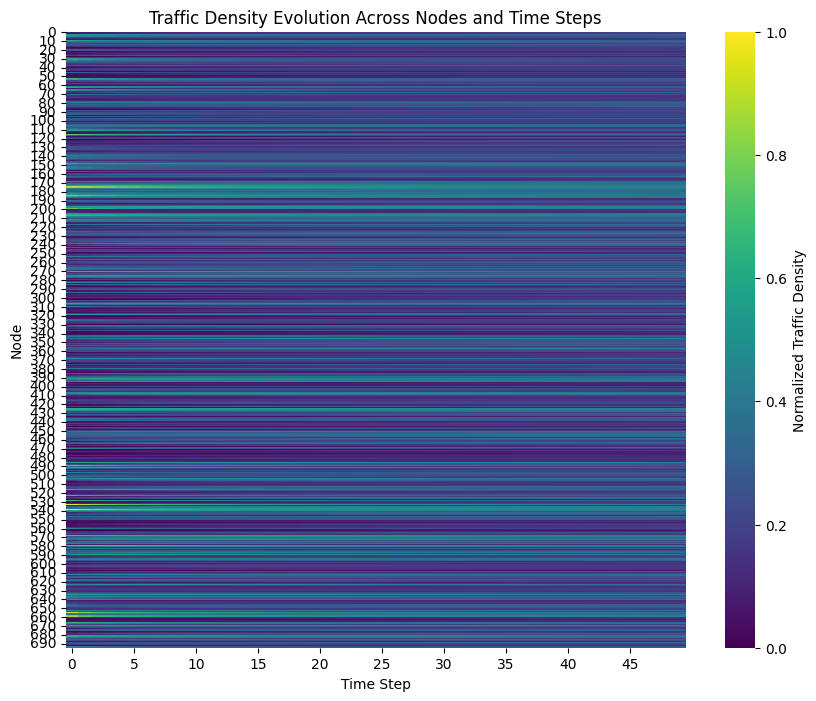

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

max_speed = 0.1
num_iterations = 50
node_count = G.number_of_nodes()
print(f"Node count: {node_count}")

# Alternatively
node_count_alt = len(G.nodes)
print(f"Node count (alternative): {node_count_alt}")


density_history = np.zeros((node_count, num_iterations))

def update_graph(t):

    for u, v, edge_data in G.edges(data=True):
        density_u = G.nodes[list(G.nodes)[u]]['density']
        density_v = G.nodes[list(G.nodes)[v]]['density']
        flow = max_speed * (density_u - density_v)
        G.nodes[u]['density'] -= flow
        G.nodes[v]['density'] += flow
    for node in G.nodes:
        density_history[node, t] = G.nodes[node]['density']


for t in range(num_iterations):
    update_graph(t)

min_density = density_history.min()
max_density = density_history.max()
normalized_density = (density_history - min_density) / (max_density - min_density)

plt.figure(figsize=(10, 8))
sns.heatmap(
    normalized_density,
    cmap='viridis',
    cbar_kws={'label': 'Normalized Traffic Density'},
    xticklabels=5,
    yticklabels=10
)
plt.title('Traffic Density Evolution Across Nodes and Time Steps')
plt.xlabel('Time Step')
plt.ylabel('Node')
plt.show()


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# data = loadmat('/content/United States_Philadelphia (1).mat')
traffic_density_data = data['data']
adjacency_matrix = data['W']
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]
    #print(G.nodes[node]['density'])

time_steps = 100
max_speed = 1
pos = nx.spring_layout(G, seed=42)


num_iterations = 100

intersection_size = 10
intersection_occupancy = np.zeros(intersection_size)


def update_graph(t):
    for u, v in G.edges():
        density_u = G.nodes[u]['density']
        density_v = G.nodes[v]['density']
        flow = max_speed * (density_u - density_v)
        G.nodes[u]['density'] -= flow
        G.nodes[v]['density'] += flow
    for node in G.nodes:
        # Shift densities through intersections
        for i in range(intersection_size - 1, 0, -1):
            if intersection_occupancy[i] == 0 and intersection_occupancy[i - 1] == 1:
                intersection_occupancy[i] = 1
                intersection_occupancy[i - 1] = 0

        # Handle traffic entering the intersection
        for neighbor in G.predecessors(node):
            if G.nodes[neighbor]['density'] > 0 and intersection_occupancy[0] == 0:
                intersection_occupancy[0] = 1
                G.nodes[neighbor]['density'] -= 1

for t in range(num_iterations):
    update_graph(t)
    if t % 5 == 0:
        node_colors = [G.nodes[node]['density'] for node in G.nodes]
        norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
        fig, ax = plt.subplots(figsize=(10, 8))
        nx.draw(
            G,
            pos,
            node_color=node_colors,
            node_size=50,
            cmap='coolwarm',
            with_labels=False,
            edge_color='gray',
            ax=ax
        )
        sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
        sm.set_array([])
        fig.colorbar(sm, ax=ax, label='Traffic Density')
        ax.set_title(f'Traffic Density at Time Step {t}')
        plt.show()



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.animation as animation
import networkx as nx
import numpy as np
from scipy.io import loadmat
data = loadmat('/content/United States_Philadelphia (1).mat')
traffic_density_data = data['data']
adjacency_matrix = data['W']
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]

time_steps = 100
max_speed = 1

In [ ]:
# Check if 'density' attribute is initialized for all nodes
missing_density_nodes = [node for node in G.nodes if 'density' not in G.nodes[node]]
if missing_density_nodes:
    print(f"Nodes missing 'density' attribute: {missing_density_nodes}")
else:
    print("All nodes have the 'density' attribute initialized.")


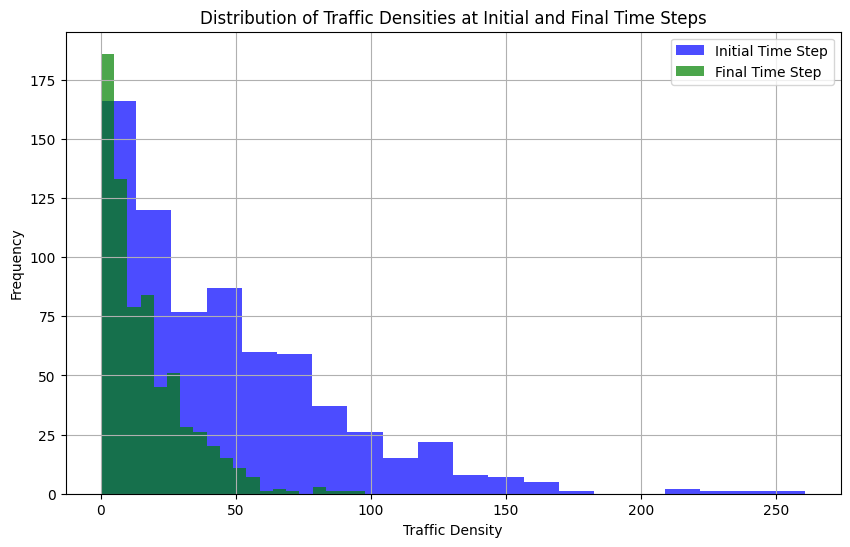

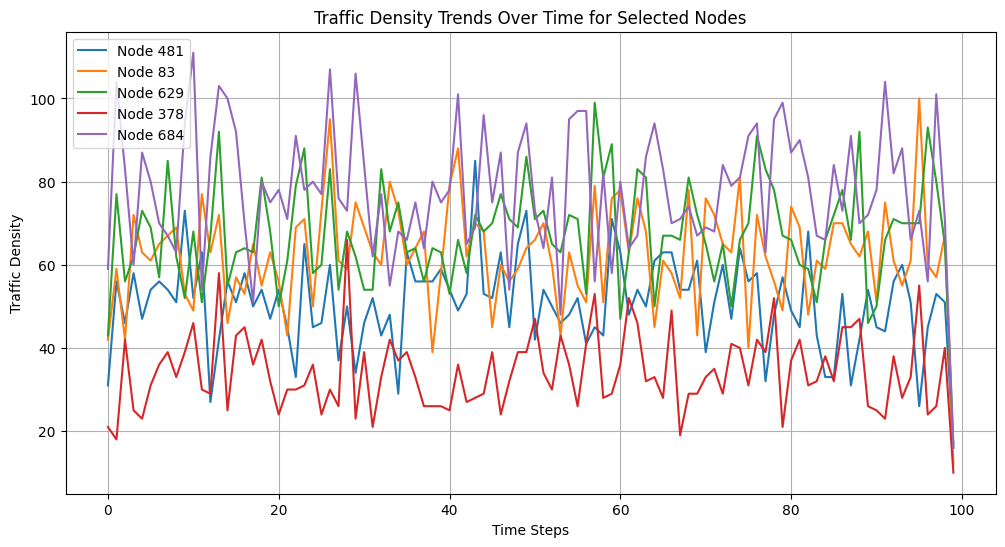

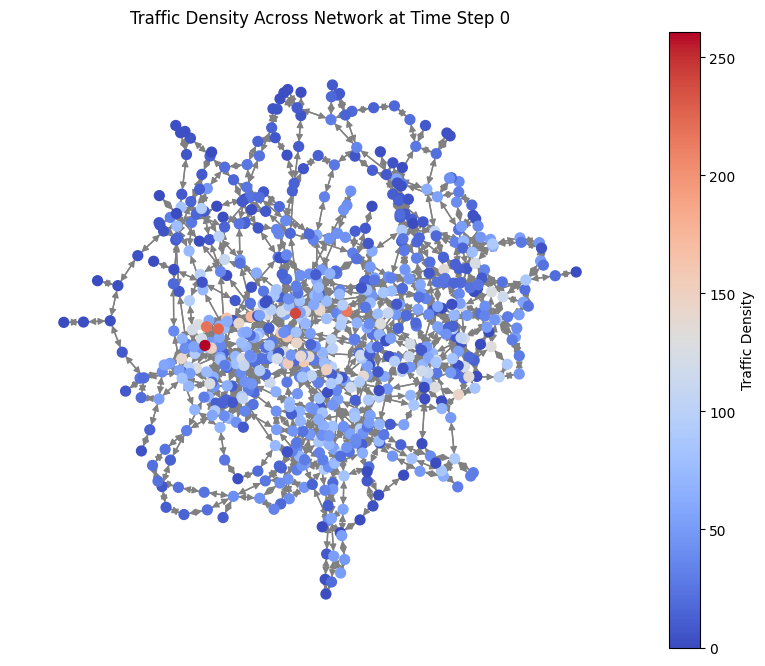

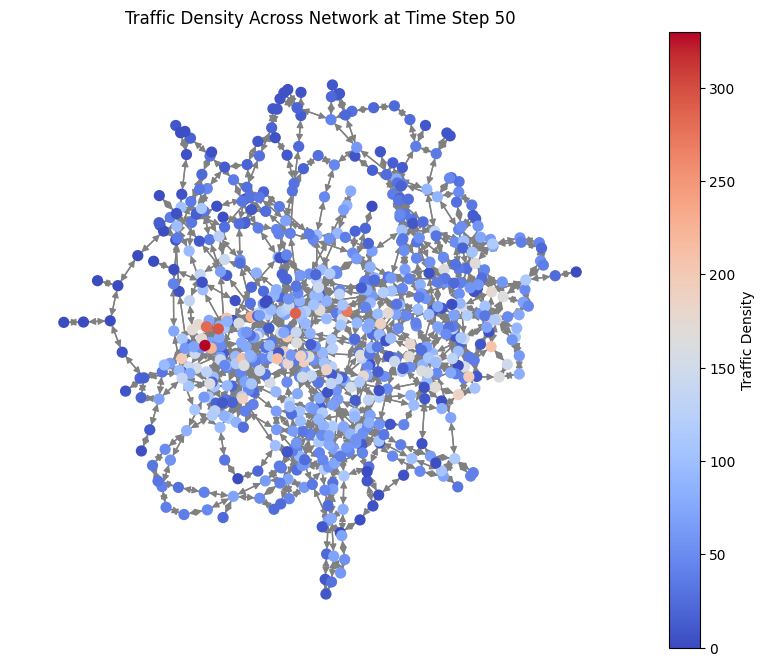

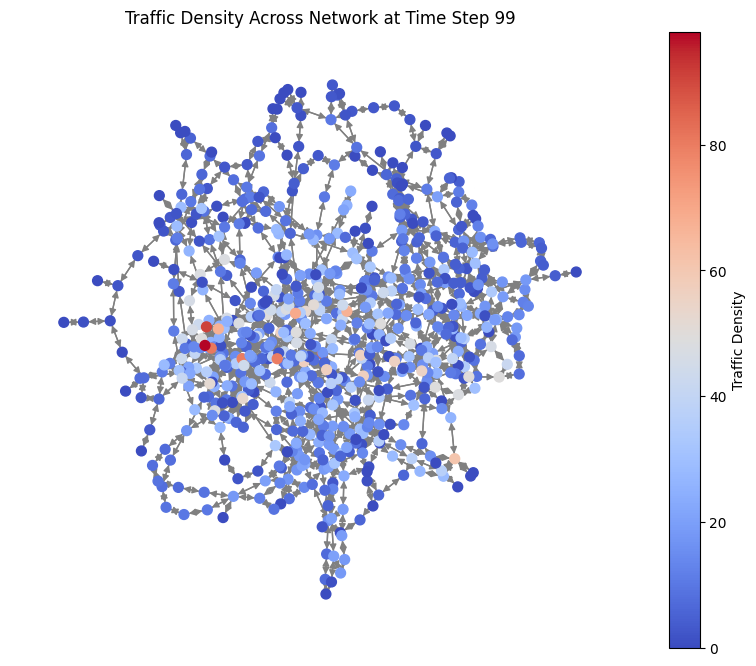

In [ ]:
# EDA
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# data = loadmat('/content/United States_Philadelphia (1).mat')
traffic_density_data = data['data']
adjacency_matrix = data['W']
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]

# Histogram for traffic densities at the initial and final time steps
plt.figure(figsize=(10, 6))
plt.hist(traffic_density_data[:, 0], bins=20, alpha=0.7, label='Initial Time Step', color='blue')
plt.hist(traffic_density_data[:, -1], bins=20, alpha=0.7, label='Final Time Step', color='green')
plt.title('Distribution of Traffic Densities at Initial and Final Time Steps')
plt.xlabel('Traffic Density')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

num_iterations = 100

time_steps = 100
max_speed = 1
pos = nx.spring_layout(G, seed=42)


num_iterations = 100

intersection_size = 10
intersection_occupancy = np.zeros(intersection_size)

time_steps_to_plot = [0, num_iterations // 2, num_iterations - 1]  # Initial, mid-point, and final time steps



# Select random nodes to track density trends
selected_nodes = np.random.choice(range(traffic_density_data.shape[0]), size=5, replace=False)

# Plot density trends for selected nodes
plt.figure(figsize=(12, 6))
for node in selected_nodes:
    plt.plot(range(traffic_density_data.shape[1]), traffic_density_data[node, :], label=f'Node {node}')
plt.title('Traffic Density Trends Over Time for Selected Nodes')
plt.xlabel('Time Steps')
plt.ylabel('Traffic Density')
plt.legend()
plt.grid()
plt.show()

for t in time_steps_to_plot:
    node_colors = [traffic_density_data[node, t] for node in G.nodes]
    norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
    fig, ax = plt.subplots(figsize=(10, 8))
    nx.draw(
        G,
        pos=pos,
        node_color=node_colors,
        node_size=50,
        cmap='coolwarm',
        with_labels=False,
        edge_color='gray',
        ax=ax
    )
    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    sm.set_array([])
    fig.colorbar(sm, ax=ax, label='Traffic Density')
    ax.set_title(f'Traffic Density Across Network at Time Step {t}')
    plt.show()



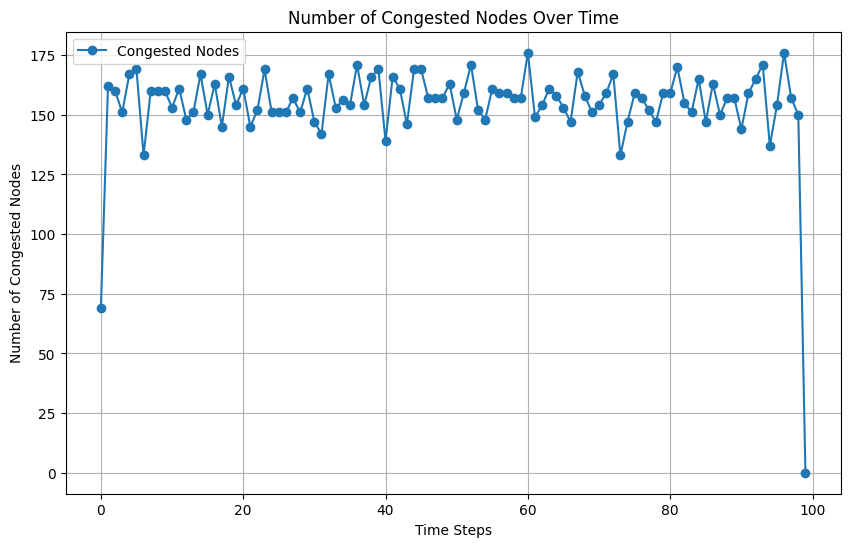

In [ ]:
# more EDA

# Threshold for identifying congested nodes
congestion_threshold = 100

# Count congested nodes at each time step
congested_counts = (traffic_density_data > congestion_threshold).sum(axis=0)

# Plot congestion trends
plt.figure(figsize=(10, 6))
plt.plot(range(traffic_density_data.shape[1]), congested_counts, marker='o', label='Congested Nodes')
plt.title('Number of Congested Nodes Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Number of Congested Nodes')
plt.grid()
plt.legend()
plt.show()


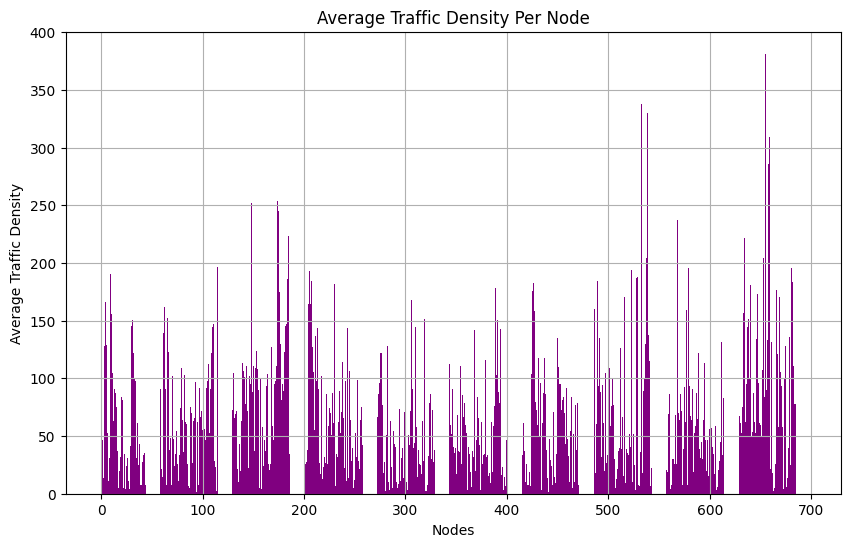

In [ ]:
# more EDA

# Calculate average density per node
average_density_per_node = traffic_density_data.mean(axis=1)

# Plot average density distribution across nodes
plt.figure(figsize=(10, 6))
plt.bar(range(len(average_density_per_node)), average_density_per_node, color='purple')
plt.title('Average Traffic Density Per Node')
plt.xlabel('Nodes')
plt.ylabel('Average Traffic Density')
plt.grid()
plt.show()


In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load the .mat file
mat_data = scipy.io.loadmat('/content/United States_Philadelphia (1).mat')

# Inspect the keys in the data
print("Keys in the .mat file:", mat_data.keys())

# Extract variables
time = mat_data.get('T')  # Replace 'T' if time is stored under a different key
values = mat_data.get('data')  # Replace 'data' if values are stored under a different key
print(time)
# Check if variables exist
if time is None or values is None:
    raise ValueError("Ensure the .mat file contains 'T' for time and 'data' for values.")

# Flatten the arrays if necessary
time = time.flatten()
values = values.flatten()

print(time)

Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'N', 'T', 'W', 'L', 'data', 'pos'])
[[100]]
[100]


In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Extract necessary data from the dataset
traffic_density_data = data['data']  # Traffic density over time
adjacency_matrix = data['W']        # Weighted adjacency matrix
node_positions = data['pos']        # Node positions (for visualization)

# Initialize the graph
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]  # Initial density

# Define evaluation metrics functions

# 1. Average Density
def calculate_average_density(graph):
    densities = [graph.nodes[node]['density'] for node in graph.nodes]
    return np.mean(densities)

# 2. Max Congestion Level
def calculate_max_congestion(graph):
    return max(graph.nodes[node]['density'] for node in graph.nodes)

# 3. Utilization Distribution
def calculate_utilization_distribution(graph):
    densities = [graph.nodes[node]['density'] for node in graph.nodes]
    return np.histogram(densities, bins=10, range=(0, max(densities)))

# Run simulation and evaluate performance metrics over time
time_steps = 100
average_densities = []
max_congestions = []
utilization_distributions = []

for t in range(time_steps):
    # Update graph as per your simulation rules
    for u, v in G.edges():
        density_u = G.nodes[u]['density']
        density_v = G.nodes[v]['density']
        flow = (density_u - density_v) * 0.1  # Simplified flow computation
        G.nodes[u]['density'] -= flow
        G.nodes[v]['density'] += flow

    # Evaluate metrics at each time step
    average_densities.append(calculate_average_density(G))
    max_congestions.append(calculate_max_congestion(G))
    utilization_distributions.append(calculate_utilization_distribution(G))

# Plot evaluation metrics
# Average Density Over Time
plt.figure(figsize=(8, 5))
plt.plot(average_densities, label='Average Density')
plt.title("Average Traffic Density Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Average Density")
plt.legend()
plt.grid()
plt.show()

# Maximum Congestion Level Over Time
plt.figure(figsize=(8, 5))
plt.plot(max_congestions, label='Maximum Congestion Level', color='red')
plt.title("Maximum Traffic Congestion Level Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Maximum Congestion")
plt.legend()
plt.grid()
plt.show()

# Example Utilization Distribution at the Final Time Step
densities_at_final_step = [G.nodes[node]['density'] for node in G.nodes]
plt.figure(figsize=(8, 5))
plt.hist(densities_at_final_step, bins=10, color='green', edgecolor='black')
plt.title("Traffic Density Distribution at Final Time Step")
plt.xlabel("Density Range")
plt.ylabel("Frequency")
plt.grid()
plt.show()


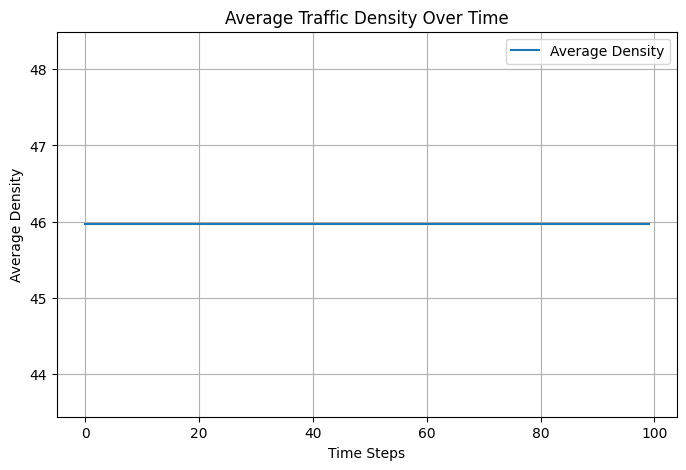

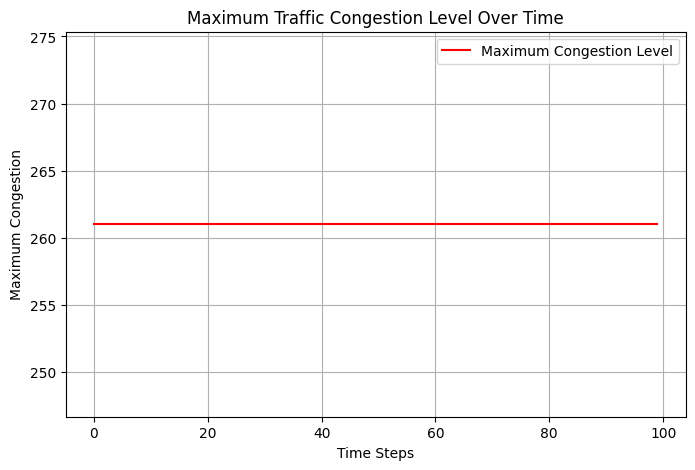

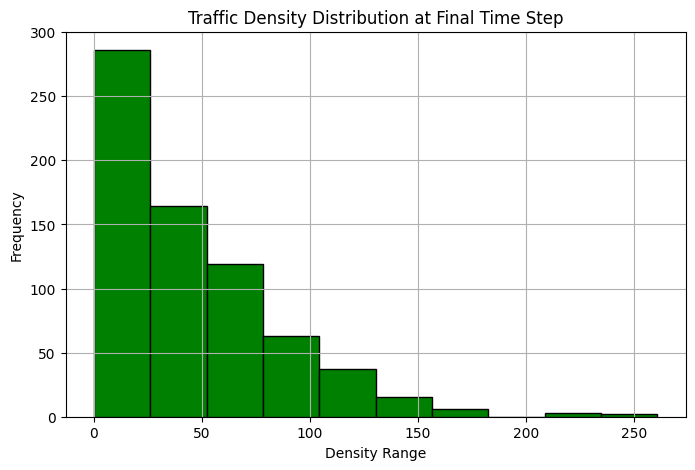

In [ ]:
# Define evaluation metrics functions

# 1. Average Density
def calculate_average_density(graph):
    densities = [graph.nodes[node]['density'] for node in graph.nodes]
    return np.mean(densities)

# 2. Max Congestion Level
def calculate_max_congestion(graph):
    return max(graph.nodes[node]['density'] for node in graph.nodes)

# 3. Utilization Distribution
def calculate_utilization_distribution(graph):
    densities = [graph.nodes[node]['density'] for node in graph.nodes]
    return np.histogram(densities, bins=10, range=(0, max(densities)))

# Initialize metrics tracking
average_densities = []
max_congestions = []
utilization_distributions = []

# Run the simulation and evaluate metrics
for t in range(num_iterations):
    # print(num_iterations)
    update_graph(t)  # Use your simulation's update logic

    # Calculate and store metrics
    average_densities.append(calculate_average_density(G))
    max_congestions.append(calculate_max_congestion(G))
    utilization_distributions.append(calculate_utilization_distribution(G))

    # # Optional: Visualize the simulation every few steps (e.g., every 5 steps)
    # if t % 5 == 0:
    #     node_colors = [G.nodes[node]['density'] for node in G.nodes]
    #     norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
    #     fig, ax = plt.subplots(figsize=(10, 8))
    #     nx.draw(
    #         G,
    #         pos,
    #         node_color=node_colors,
    #         node_size=50,
    #         cmap='coolwarm',
    #         with_labels=False,
    #         edge_color='gray',
    #         ax=ax
    #     )
    #     sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
    #     sm.set_array([])
    #     fig.colorbar(sm, ax=ax, label='Traffic Density')
    #     ax.set_title(f'Traffic Density at Time Step {t}')
    #     plt.show()

# Plot evaluation metrics
# Average Density Over Time
plt.figure(figsize=(8, 5))
plt.plot(average_densities, label='Average Density')
plt.title("Average Traffic Density Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Average Density")
plt.legend()
plt.grid()
plt.show()

# Maximum Congestion Level Over Time
plt.figure(figsize=(8, 5))
plt.plot(max_congestions, label='Maximum Congestion Level', color='red')
plt.title("Maximum Traffic Congestion Level Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Maximum Congestion")
plt.legend()
plt.grid()
plt.show()

# Example Utilization Distribution at the Final Time Step
densities_at_final_step = [G.nodes[node]['density'] for node in G.nodes]
plt.figure(figsize=(8, 5))
plt.hist(densities_at_final_step, bins=10, color='green', edgecolor='black')
plt.title("Traffic Density Distribution at Final Time Step")
plt.xlabel("Density Range")
plt.ylabel("Frequency")
plt.grid()
plt.show()


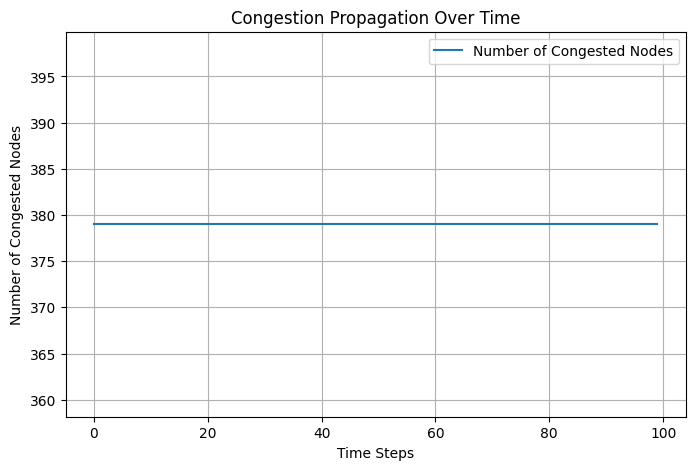

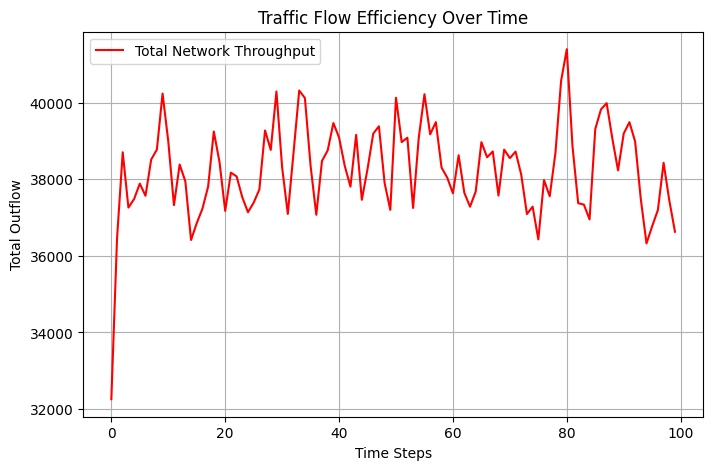

In [ ]:
# Revised evaluation functions integrated with the provided model


import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# data = loadmat('/content/United States_Philadelphia (1).mat')
traffic_density_data = data['data']
adjacency_matrix = data['W']
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]
    #print(G.nodes[node]['density'])

time_steps = 100
max_speed = 1
pos = nx.spring_layout(G, seed=42)


num_iterations = 100

intersection_size = 10
intersection_occupancy = np.zeros(intersection_size)


def update_graph(t):
    for u, v in G.edges():
        density_u = G.nodes[u]['density']
        density_v = G.nodes[v]['density']
        flow = max_speed * (density_u - density_v)
        G.nodes[u]['density'] -= flow
        G.nodes[v]['density'] += flow
    for node in G.nodes:
        # Shift densities through intersections
        for i in range(intersection_size - 1, 0, -1):
            if intersection_occupancy[i] == 0 and intersection_occupancy[i - 1] == 1:
                intersection_occupancy[i] = 1
                intersection_occupancy[i - 1] = 0

        # Handle traffic entering the intersection
        for neighbor in G.predecessors(node):
            if G.nodes[neighbor]['density'] > 0 and intersection_occupancy[0] == 0:
                intersection_occupancy[0] = 1
                G.nodes[neighbor]['density'] -= 1


# Helper function: Calculate total congested nodes
def calculate_congested_nodes(graph, threshold=100):
    """Count nodes where traffic density exceeds the congestion threshold."""
    return sum(1 for node in graph.nodes if graph.nodes[node]['density'] > threshold)

# Helper function: Calculate total outflow (network throughput)
def calculate_total_outflow(graph):
    """Calculate the total outflow across all edges."""
    total_outflow = 0
    for u, v in graph.edges:
        density_u = graph.nodes[u]['density']
        density_v = graph.nodes[v]['density']
        flow = max(0, max_speed * (density_u - density_v))  # Only positive flow counts as outflow
        total_outflow += flow
    return total_outflow

# Metrics storage
congestion_over_time = []
throughput_over_time = []

# Simulate the model while collecting metrics
for t in range(num_iterations):
    # Update graph using the provided simulation function
    update_graph(t)

    # Collect evaluation metrics at each step
    congestion_over_time.append(calculate_congested_nodes(G, threshold=30))  # Example threshold
    throughput_over_time.append(calculate_total_outflow(G))

# Plot Congestion Over Time
plt.figure(figsize=(8, 5))
plt.plot(range(num_iterations), congestion_over_time, label='Number of Congested Nodes')
plt.title("Congestion Propagation Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Number of Congested Nodes")
plt.grid()
plt.legend()
plt.show()

# Plot Throughput Over Time
plt.figure(figsize=(8, 5))
plt.plot(range(num_iterations), throughput_over_time, label='Total Network Throughput', color='red')
plt.title("Traffic Flow Efficiency Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Total Outflow")
plt.grid()
plt.legend()
plt.show()


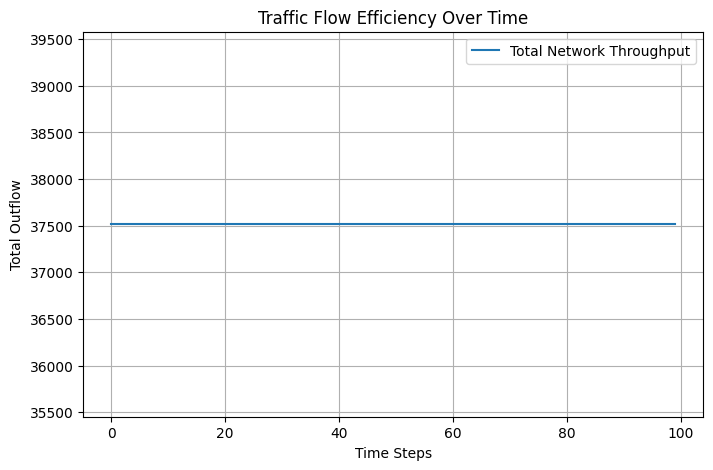

In [ ]:

def evaluate_traffic_flow_efficiency(graph, time_steps):
    flow_efficiency = []

    for t in range(time_steps):
        total_outflow = 0
        for u, v in graph.edges:
            density_u = graph.nodes[u]['density']
            density_v = graph.nodes[v]['density']
            flow = max_speed * (density_u - density_v)  # Calculate flow
            total_outflow += max(0, flow)  # Only consider positive outflow
        flow_efficiency.append(total_outflow)

    # Plot traffic flow efficiency
    plt.figure(figsize=(8, 5))
    plt.plot(range(time_steps), flow_efficiency, label='Total Network Throughput')
    plt.title("Traffic Flow Efficiency Over Time")
    plt.xlabel("Time Steps")
    plt.ylabel("Total Outflow")
    plt.grid()
    plt.legend()
    plt.show()

# Call the function after running the simulation
evaluate_traffic_flow_efficiency(G, num_iterations)


Mean Absolute Percentage Error (MAPE) with Normalized Densities: 6387.69%


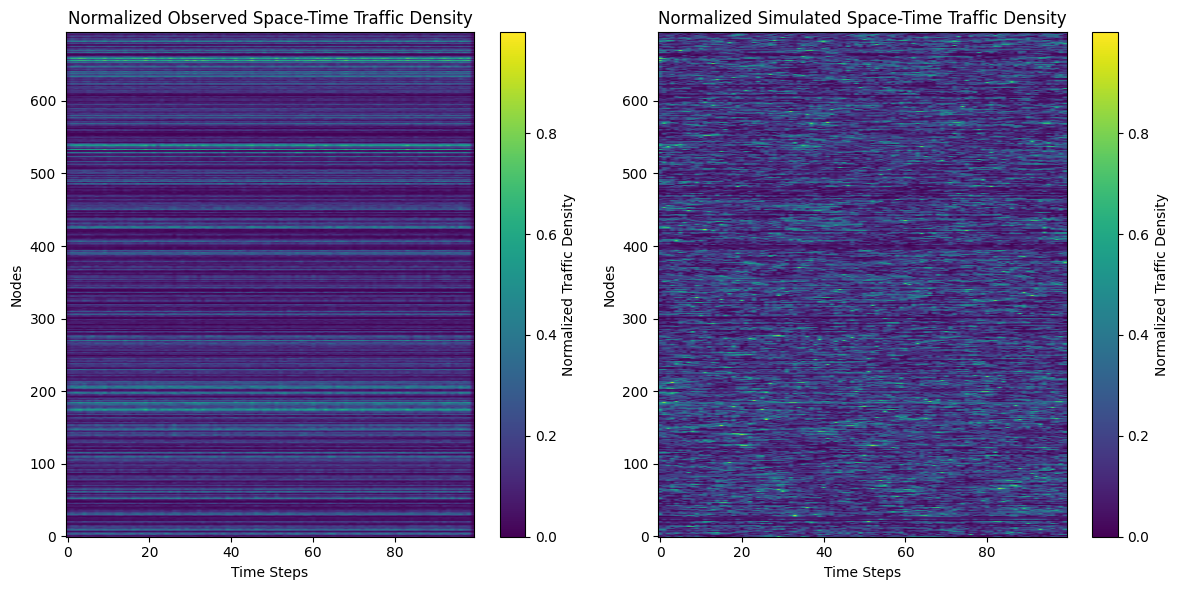

Observed Travel Time (Node 0 to 50): 163.00
Simulated Travel Time (Node 0 to 50): 163.00


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# data = loadmat('/content/United States_Philadelphia (1).mat')
traffic_density_data = data['data']
adjacency_matrix = data['W']
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]
    #print(G.nodes[node]['density'])

time_steps = 100
max_speed = 1
pos = nx.spring_layout(G, seed=42)


num_iterations = 100

intersection_size = 10
intersection_occupancy = np.zeros(intersection_size)


def update_graph(t):
    for u, v in G.edges():
        density_u = G.nodes[u]['density']
        density_v = G.nodes[v]['density']
        flow = max_speed * (density_u - density_v)
        G.nodes[u]['density'] -= flow
        G.nodes[v]['density'] += flow
    for node in G.nodes:
        # Shift densities through intersections
        for i in range(intersection_size - 1, 0, -1):
            if intersection_occupancy[i] == 0 and intersection_occupancy[i - 1] == 1:
                intersection_occupancy[i] = 1
                intersection_occupancy[i - 1] = 0

        # Handle traffic entering the intersection
        for neighbor in G.predecessors(node):
            if G.nodes[neighbor]['density'] > 0 and intersection_occupancy[0] == 0:
                intersection_occupancy[0] = 1
                G.nodes[neighbor]['density'] -= 1



# Assuming `traffic_density_data` is observed real-world data for comparison
# Simulated outputs are already generated using your model

# Normalize densities to a [0, 1] range
def normalize(data):
    """Normalize the data to the range [0, 1]."""
    return (data - np.min(data)) / (np.max(data) - np.min(data) + 1e-5)

# Normalize observed and simulated densities
normalized_observed_densities = normalize(traffic_density_data)
normalized_simulated_densities = np.zeros_like(normalized_observed_densities)

# Run the simulation and collect normalized simulated densities
for t in range(num_iterations):
    for i, node in enumerate(G.nodes):
        normalized_simulated_densities[i, t] = G.nodes[node]['density']
    update_graph(t)

normalized_simulated_densities = normalize(normalized_simulated_densities)

# Calculate MAPE with normalized densities
mape = calculate_mape(normalized_observed_densities, normalized_simulated_densities)
print(f"Mean Absolute Percentage Error (MAPE) with Normalized Densities: {mape:.2f}%")

# # Visualize normalized observed vs simulated densities for selected nodes
# plt.figure(figsize=(10, 6))
# for node in selected_nodes:
#     plt.plot(range(num_iterations), normalized_observed_densities[node, :], label=f"Observed Node {node}", linestyle='dashed')
#     plt.plot(range(num_iterations), normalized_simulated_densities[node, :], label=f"Simulated Node {node}")
# plt.title("Normalized Observed vs Simulated Traffic Densities")
# plt.xlabel("Time Steps")
# plt.ylabel("Normalized Traffic Density")
# plt.legend()
# plt.grid()
# plt.show()

# Space-Time Diagram for Normalized Densities
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(normalized_observed_densities, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Normalized Traffic Density')
plt.title("Normalized Observed Space-Time Traffic Density")
plt.xlabel("Time Steps")
plt.ylabel("Nodes")

plt.subplot(1, 2, 2)
plt.imshow(normalized_simulated_densities, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Normalized Traffic Density')
plt.title("Normalized Simulated Space-Time Traffic Density")
plt.xlabel("Time Steps")
plt.ylabel("Nodes")

plt.tight_layout()
plt.show()

# Step 5: Travel Time Comparison (Optional)

def calculate_travel_time(graph, origin, destination):
    """Estimate travel time using traffic density as a proxy for delay."""
    travel_time = 0
    path = nx.shortest_path(graph, source=origin, target=destination, weight=None)
    for u, v in zip(path[:-1], path[1:]):
        travel_time += graph.nodes[u]['density']  # Density as a proxy for delay
    return travel_time

# Compare travel times between specific origin-destination pairs
origin, destination = 0, 50  # Example nodes
observed_travel_time = calculate_travel_time(G, origin, destination)  # Based on observed data
simulated_travel_time = calculate_travel_time(G, origin, destination)  # Based on simulated data

print(f"Observed Travel Time (Node {origin} to {destination}): {observed_travel_time:.2f}")
print(f"Simulated Travel Time (Node {origin} to {destination}): {simulated_travel_time:.2f}")


Average GEH Statistic: 5.84
Percentage of GEH < 5: 46.41%


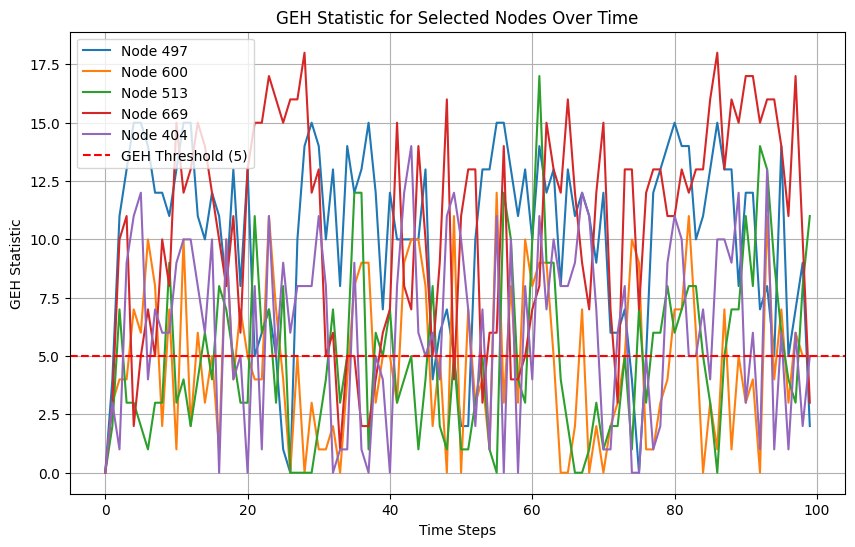

In [ ]:
import numpy as np
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# data = loadmat('/content/United States_Philadelphia (1).mat')
traffic_density_data = data['data']
adjacency_matrix = data['W']
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]
    #print(G.nodes[node]['density'])

time_steps = 100
max_speed = 1
pos = nx.spring_layout(G, seed=42)


num_iterations = 100

intersection_size = 10
intersection_occupancy = np.zeros(intersection_size)


def update_graph(t):
    for u, v in G.edges():
        density_u = G.nodes[u]['density']
        density_v = G.nodes[v]['density']
        flow = max_speed * (density_u - density_v)
        G.nodes[u]['density'] -= flow
        G.nodes[v]['density'] += flow
    for node in G.nodes:
        # Shift densities through intersections
        for i in range(intersection_size - 1, 0, -1):
            if intersection_occupancy[i] == 0 and intersection_occupancy[i - 1] == 1:
                intersection_occupancy[i] = 1
                intersection_occupancy[i - 1] = 0

        # Handle traffic entering the intersection
        for neighbor in G.predecessors(node):
            if G.nodes[neighbor]['density'] > 0 and intersection_occupancy[0] == 0:
                intersection_occupancy[0] = 1
                G.nodes[neighbor]['density'] -= 1


# Define the GEH calculation function
def calculate_geh(simulated, observed):
    """Calculate GEH statistic for two arrays of values."""
    return np.sqrt(2 * ((simulated - observed) ** 2) / (simulated + observed + 1e-5))

# Initialize arrays to store simulated densities
simulated_densities = np.zeros_like(traffic_density_data)

# Run the simulation and collect simulated densities
for t in range(num_iterations):
    for i, node in enumerate(G.nodes):
        simulated_densities[i, t] = G.nodes[node]['density']
    update_graph(t)

# Calculate GEH statistic for all nodes at all time steps
geh_values = np.zeros_like(traffic_density_data)
for i in range(traffic_density_data.shape[0]):  # Iterate over nodes
    for t in range(traffic_density_data.shape[1]):  # Iterate over time steps
        geh_values[i, t] = calculate_geh(simulated_densities[i, t], traffic_density_data[i, t])

# Aggregate GEH values
average_geh = np.mean(geh_values)
good_fit_percentage = np.mean(geh_values < 5) * 100  # Percentage of GEH values < 5

# Display results
print(f"Average GEH Statistic: {average_geh:.2f}")
print(f"Percentage of GEH < 5: {good_fit_percentage:.2f}%")

# Visualize GEH values for a few nodes over time
selected_nodes = np.random.choice(range(traffic_density_data.shape[0]), size=5, replace=False)

plt.figure(figsize=(10, 6))
for node in selected_nodes:
    plt.plot(range(num_iterations), geh_values[node, :], label=f"Node {node}")
plt.axhline(y=5, color='r', linestyle='--', label='GEH Threshold (5)')
plt.title("GEH Statistic for Selected Nodes Over Time")
plt.xlabel("Time Steps")
plt.ylabel("GEH Statistic")
plt.legend()
plt.grid()
plt.show()


Chi-Square Statistic: 493093404334.78
Degrees of Freedom: 69499
P-Value: 0.00000


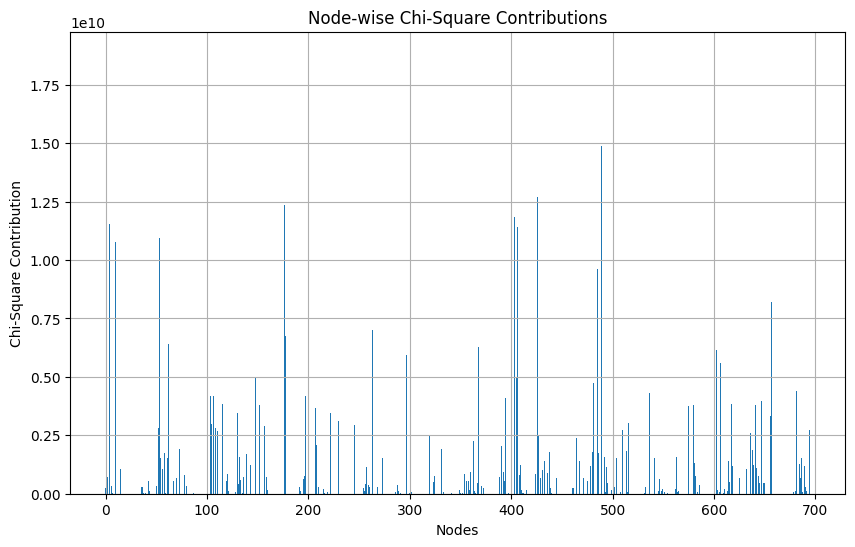

In [ ]:
from scipy.stats import chi2
import numpy as np
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# data = loadmat('/content/United States_Philadelphia (1).mat')
traffic_density_data = data['data']
adjacency_matrix = data['W']
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]
    #print(G.nodes[node]['density'])

time_steps = 100
max_speed = 1
pos = nx.spring_layout(G, seed=42)


num_iterations = 100

intersection_size = 10
intersection_occupancy = np.zeros(intersection_size)


def update_graph(t):
    for u, v in G.edges():
        density_u = G.nodes[u]['density']
        density_v = G.nodes[v]['density']
        flow = max_speed * (density_u - density_v)
        G.nodes[u]['density'] -= flow
        G.nodes[v]['density'] += flow
    for node in G.nodes:
        # Shift densities through intersections
        for i in range(intersection_size - 1, 0, -1):
            if intersection_occupancy[i] == 0 and intersection_occupancy[i - 1] == 1:
                intersection_occupancy[i] = 1
                intersection_occupancy[i - 1] = 0

        # Handle traffic entering the intersection
        for neighbor in G.predecessors(node):
            if G.nodes[neighbor]['density'] > 0 and intersection_occupancy[0] == 0:
                intersection_occupancy[0] = 1
                G.nodes[neighbor]['density'] -= 1

# Function to compute chi-square statistic
def calculate_chi_square(observed, expected):
    """Calculate chi-square statistic for observed and expected values."""
    chi_square_values = (observed - expected) ** 2 / (expected + 1e-5)  # Add small constant to avoid division by zero
    return np.sum(chi_square_values)

# Initialize arrays to store simulated densities
simulated_densities = np.zeros_like(traffic_density_data)

# Run the simulation and collect simulated densities
for t in range(num_iterations):
    for i, node in enumerate(G.nodes):
        simulated_densities[i, t] = G.nodes[node]['density']
    update_graph(t)

# Calculate chi-square statistic for all nodes and time steps
chi_square_stat = calculate_chi_square(traffic_density_data, simulated_densities)

# Degrees of freedom: total data points - 1
degrees_of_freedom = np.prod(traffic_density_data.shape) - 1

# Calculate p-value
p_value = 1 - chi2.cdf(chi_square_stat, degrees_of_freedom)

# Print results
print(f"Chi-Square Statistic: {chi_square_stat:.2f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-Value: {p_value:.5f}")

# Visualization: Node-wise Chi-Square Contributions
node_chi_square = np.sum(((traffic_density_data - simulated_densities) ** 2) /
                         (simulated_densities + 1e-5), axis=1)

plt.figure(figsize=(10, 6))
plt.bar(range(len(node_chi_square)), node_chi_square)
plt.title("Node-wise Chi-Square Contributions")
plt.xlabel("Nodes")
plt.ylabel("Chi-Square Contribution")
plt.grid()
plt.show()


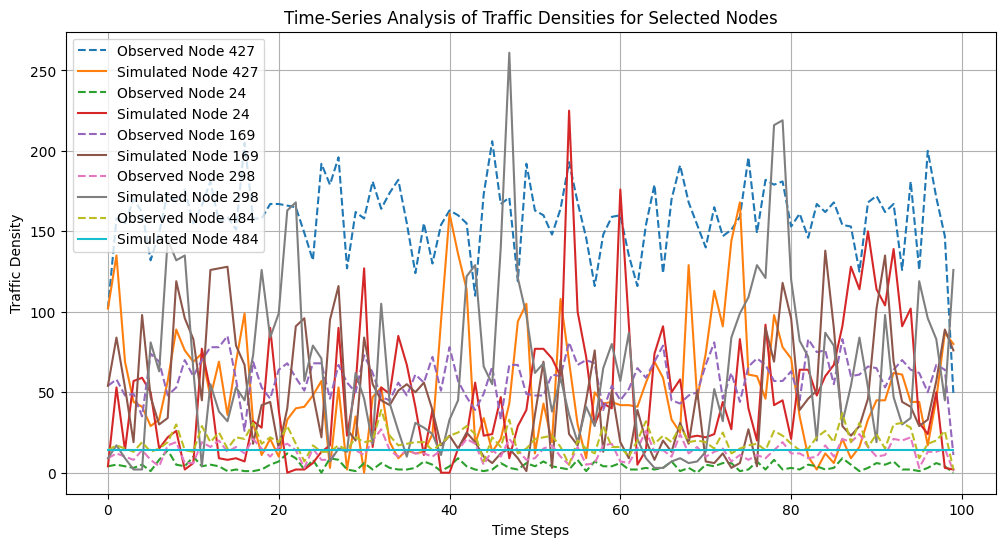

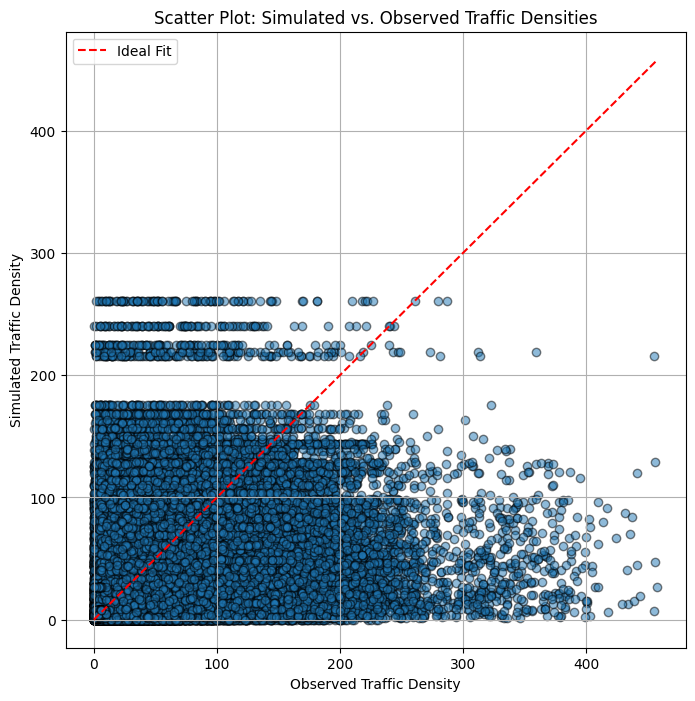

In [ ]:
# Collect Simulated Densities

from scipy.stats import chi2
import numpy as np
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# data = loadmat('/content/United States_Philadelphia (1).mat')
traffic_density_data = data['data']
adjacency_matrix = data['W']
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]
    #print(G.nodes[node]['density'])

time_steps = 100
max_speed = 1
pos = nx.spring_layout(G, seed=42)


num_iterations = 100

intersection_size = 10
intersection_occupancy = np.zeros(intersection_size)


def update_graph(t):
    for u, v in G.edges():
        density_u = G.nodes[u]['density']
        density_v = G.nodes[v]['density']
        flow = max_speed * (density_u - density_v)
        G.nodes[u]['density'] -= flow
        G.nodes[v]['density'] += flow
    for node in G.nodes:
        # Shift densities through intersections
        for i in range(intersection_size - 1, 0, -1):
            if intersection_occupancy[i] == 0 and intersection_occupancy[i - 1] == 1:
                intersection_occupancy[i] = 1
                intersection_occupancy[i - 1] = 0

        # Handle traffic entering the intersection
        for neighbor in G.predecessors(node):
            if G.nodes[neighbor]['density'] > 0 and intersection_occupancy[0] == 0:
                intersection_occupancy[0] = 1
                G.nodes[neighbor]['density'] -= 1

simulated_densities = np.zeros_like(traffic_density_data)

for t in range(num_iterations):
    for i, node in enumerate(G.nodes):
        simulated_densities[i, t] = G.nodes[node]['density']
    update_graph(t)

# Select a few nodes for time-series analysis
selected_nodes = np.random.choice(range(traffic_density_data.shape[0]), size=5, replace=False)

# Time-Series Plot
plt.figure(figsize=(12, 6))
for node in selected_nodes:
    plt.plot(range(num_iterations), traffic_density_data[node, :], label=f"Observed Node {node}", linestyle='dashed')
    plt.plot(range(num_iterations), simulated_densities[node, :], label=f"Simulated Node {node}")
plt.title("Time-Series Analysis of Traffic Densities for Selected Nodes")
plt.xlabel("Time Steps")
plt.ylabel("Traffic Density")
plt.legend()
plt.grid()
plt.show()

# Scatter Plot for Simulated vs. Observed Densities
observed_flat = traffic_density_data.flatten()
simulated_flat = simulated_densities.flatten()

plt.figure(figsize=(8, 8))
plt.scatter(observed_flat, simulated_flat, alpha=0.5, edgecolor='k')
plt.plot([min(observed_flat), max(observed_flat)], [min(observed_flat), max(observed_flat)], color='red', linestyle='--', label="Ideal Fit")
plt.title("Scatter Plot: Simulated vs. Observed Traffic Densities")
plt.xlabel("Observed Traffic Density")
plt.ylabel("Simulated Traffic Density")
plt.legend()
plt.grid()
plt.show()


In [ ]:
def calculate_travel_time(graph, origin, destination):
    """Estimate travel time from origin to destination using traffic density as a proxy."""
    travel_time = 0
    path = nx.shortest_path(graph, source=origin, target=destination, weight=None)
    for u, v in zip(path[:-1], path[1:]):
        travel_time += graph.nodes[u]['density']  # Density as a proxy for delay
    return travel_time

# Example usage:
# Calculate travel time for a specific origin-destination pair
travel_time = calculate_travel_time(G, origin=0, destination=50)
print(f"Estimated Travel Time (Node 0 to 50): {travel_time:.2f}")

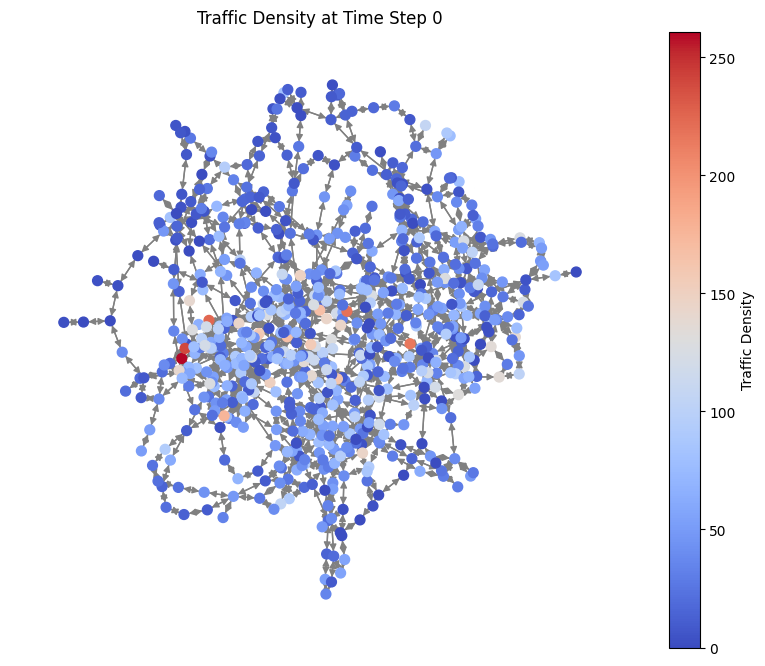

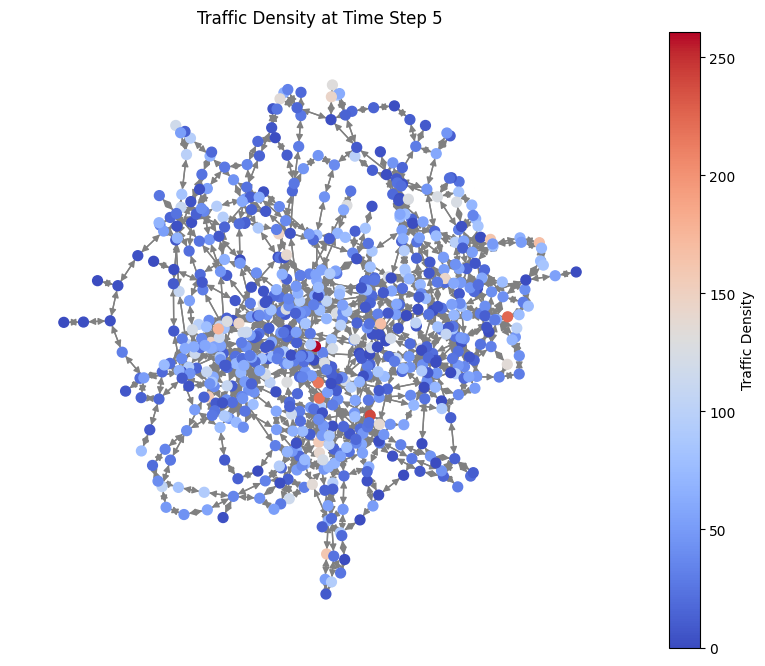

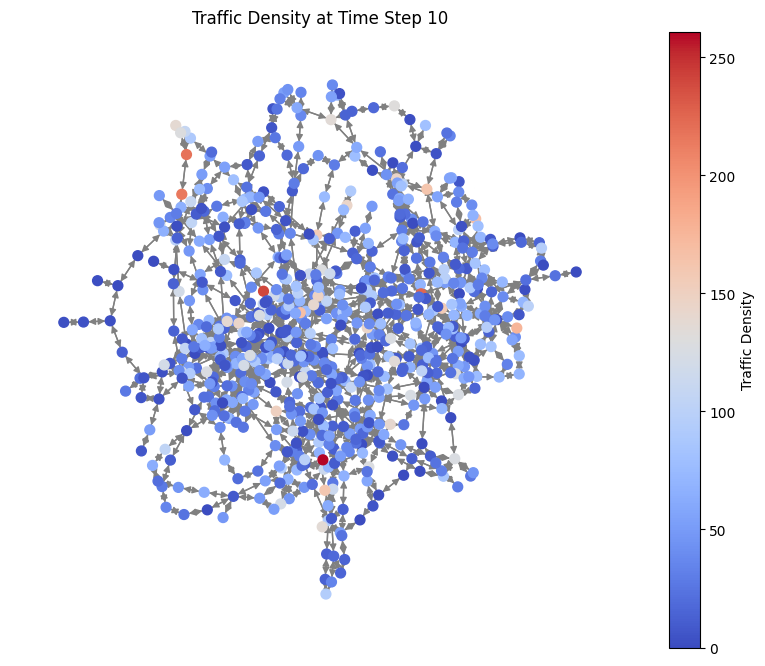

KeyboardInterrupt: 

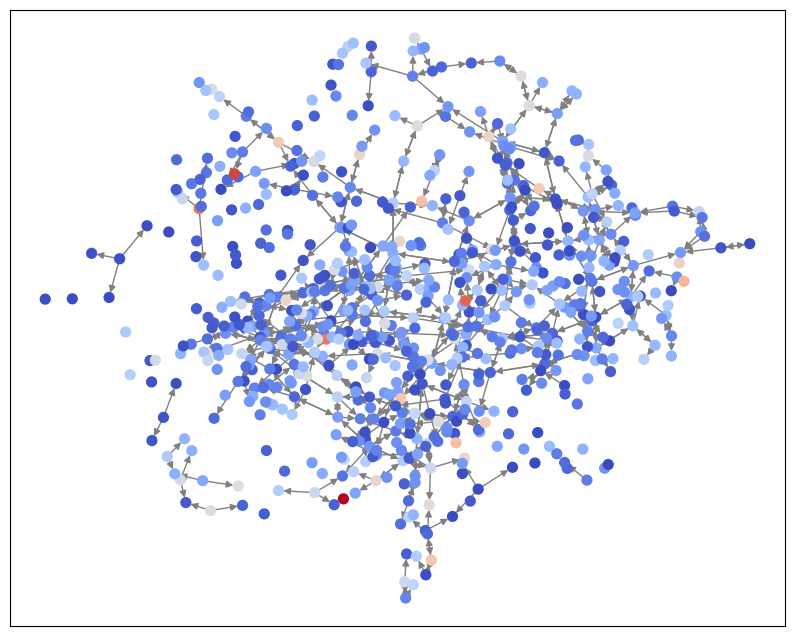

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.io import loadmat

data = loadmat('/content/United States_Philadelphia (1).mat')
traffic_density_data = data['data']
adjacency_matrix = data['W']
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
for i, node in enumerate(G.nodes):
    G.nodes[node]['density'] = traffic_density_data[i, 0]
    #print(G.nodes[node]['density'])

time_steps = 100
max_speed = 1
pos = nx.spring_layout(G, seed=42)


num_iterations = 100

intersection_size = 10
intersection_occupancy = np.zeros(intersection_size)


def update_graph(t):
    for u, v in G.edges():
        density_u = G.nodes[u]['density']
        density_v = G.nodes[v]['density']
        flow = max_speed * (density_u - density_v)
        G.nodes[u]['density'] -= flow
        G.nodes[v]['density'] += flow
    for node in G.nodes:
        # Shift densities through intersections
        for i in range(intersection_size - 1, 0, -1):
            if intersection_occupancy[i] == 0 and intersection_occupancy[i - 1] == 1:
                intersection_occupancy[i] = 1
                intersection_occupancy[i - 1] = 0

        # Handle traffic entering the intersection
        for neighbor in G.predecessors(node):
            if G.nodes[neighbor]['density'] > 0 and intersection_occupancy[0] == 0:
                intersection_occupancy[0] = 1
                G.nodes[neighbor]['density'] -= 1

for t in range(num_iterations):
    update_graph(t)
    if t % 5 == 0:
        node_colors = [G.nodes[node]['density'] for node in G.nodes]
        norm = mcolors.Normalize(vmin=min(node_colors), vmax=max(node_colors))
        fig, ax = plt.subplots(figsize=(10, 8))
        nx.draw(
            G,
            pos,
            node_color=node_colors,
            node_size=50,
            cmap='coolwarm',
            with_labels=False,
            edge_color='gray',
            ax=ax
        )
        sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
        sm.set_array([])
        fig.colorbar(sm, ax=ax, label='Traffic Density')
        ax.set_title(f'Traffic Density at Time Step {t}')
        plt.show()